# Machine Learning Pipeline

In [1]:
# importo le librerie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from scipy.stats import poisson, randint

In [2]:
# carico il dataset dividendo tra features e labels
features, target = datasets.load_wine(return_X_y = True, as_frame = True)
"""
bene
"""

'\nbene\n'

In [3]:
# stampo matrice delle features
display(features)
# stampo vettore target
display(target)

# mostro quante sono le possibili labels
pd.unique(target)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

array([0, 1, 2])

In [3]:
# divido in training set e test set, utilizzando il 30% dei dati per il test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30)

In [ ]:
"""
decision tree ha almeno un iperparametro importante, che dovrebbe essere validato

la profondità(?)
---
yep
---

gli iperparametri di un modello cambiano completamente le sue performance,
e non è detto che un primo addestramento con dei valori di default ne diano un'idea ragionevole

prima di cambiare modello, prova a validare gli iperparametri di DT

quali sono? che effetto hanno sul fitting dei dati?

La profondità (max_depth) indica quanto sarà esteso l'albero,
cioè il numero di nodi per ogni decisione.
---
il numero massimo di nodi di una decisione, cioè la lunghezza massima
del percorso tra la radice e una foglia; che effetto ha sull'addestramento?
a cosa corrisponde una profondità alta? e una bassa?
---

min_sample_leaf indica il numero minimo di esempi necessari perchè ci si trovi in una foglia
---
il numero minimo di esempi che può avere una foglia; questo evita di splittare ulteriormente
nodi con troppi pochi esempi; che effetto ha? a cosa corrispondono valori alti o bassi?

la documentazione dice anche:

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are
the minimum number of samples for each node; in altre parole, puoi scegliere questo
valore in modo relativo alla dimensione del tuo dataset
---

max_features indica il numero di feature da considerare quando si sceglie la migliore per eseguire uno split.
---
ok; questo iperparametro di solito si valida in un ensemble di alberi come random forest;
per DT puoi lasciare il valore di default
---

max_leaf_node indica il numero massimo di foglie: di volta in volta viene eseguito lo split con il maggior decremento di entropia, fino ad arrivare al numero massimo di foglie desiderato.
---
questo iperparametro è un po' difficile da interpretare/validare; personalmente lo lascio com'è;
---

---
riassumendo: puoi validare la profondità; volendo, min_samples_leaf e min_samples_split
---

"""

In [4]:
# Creo il modello
tree = DecisionTreeClassifier()

# creo distribuzione dell'iperparametro
depth_distribution = {'max_depth': poisson(mu = 10), 'max_leaf_nodes': randint(low = 5, high = 35)}
"""
ok usare random search, e bene provare a passare una distribuzione

perché poisson con media 10? idealmente ogni valore di profondità è buono, quindi meglio
campionare da una distribuzione uniforme

ok per max_leaf_nodes, anche se come ti dicevo preferisco validare
min_samples_leaf e min_samples_split

che distrubuzione useresti per questi ultimi due iperparametri?
"""

# valido l'iperparametro
clf = RandomizedSearchCV(estimator = tree, n_iter = 10, param_distributions = depth_distribution, n_jobs = -1, scoring = 'accuracy', cv = 5)
"""
n_iter = 10 sono un po' poche (specialmente per modelli più complessi di DT, con
diversi iperparametri da validare)

cosa succede se rilanci questo esperimento? ti aspetti sempre lo stesso risultato?
a cosa è dovuto? come puoi "fissare" questa eventuale randomicità?
"""

# addestro il modello
clf.fit(X_train, y_train)

# i migliori valori dei parametri
print(f'i migliori valori dei parametri sono: {clf.best_params_}')

# valuto la accuratezza media della migliore combinazione di parametri
tree_score = clf.best_score_
print(f"l'accuratezza media del miglior modello è {tree_score}")
                                                  
# valuto l'accuratezza sul test set
tree_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"l'accuratezza sul test set è {tree_test_score}")

i migliori valori dei parametri sono: {'max_depth': 8, 'max_leaf_nodes': 15}
0.9196666666666667
0.9259259259259259


In [6]:
# controllo che la precisione non sia dovuta a una classe prevalente
"""
accuratezza, non precisione; che differenza c'è?

accuratezza = rapporto tra i casi correttamente classificati e i casi totali
precisione = frazione dei soggetti realmente positivi tra quelli etichettati come tali
---
ok
---

come gestiresti un eventuale sbilanciamento tra le classi (metrica? modello?)

come metriche utilizzerei sia la precision che la recall,
o per avere un indicatore più sintetico l'F1 score.
---
ok; visto che il problema è multiclasse, come definiresti recall e precision?
prova a indagare sul concetto di micro-macro-weighted average e dai un'occhiata
alla confusion matrix
---
un eventuale sbilanciamento tra le classi può causare overfitting,
per questo utilizzerei un metodo ensemble di averaging/voting che punti a
diminuire la varianza del modello.
---
un eventuale sbilanciamento tra le classi, più che overfitting (= imparare
troppo dal training set, che è solo un campione del fenomeno che stai studiando),
fa sì che il tuo modello dia più importanza a una classe rispetto all'altra
(o alle altre)

che argomenti puoi usare per bilanciare le classi in fase di addestramento? vedi qui
(anche se vale per tutti i modelli):
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

ultimo aspetto, la divisione in fold; la tua random search usa cv=5, dividendo i dati
in 5 fold; come viene costruito questo split? che alternative hai?
prova a indagare a partire dalla documentazione di random search
---
"""

target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [ ]:
"""
altra cosa: è necessario scalare i dati prima dell'apprendimento con DT? perché?

Non è necessario scalare i dati perchè non c'è un trade off
tra due grandezze: ogni nodo esegue lo split sulla base di una sola feature.
Riscalando i dati si scalerebbe anche la soglia di separazione dei
dati all'interno del nodo, ma non cambierebbe il risultato.
---
ok: quando splitti ogni feature viene valutata da sola, una alla volta,
mai in combinazione con le altre
---
"""

Il modello Decision Tree fornisce già degli ottimi risultati sul test set (precisione del 92%). Tuttavia, passando ad un modello Random Forest, si potrebbe ulteriormente ridurre la varianza eccessiva del modello e quindi un leggero overfitting.

In [ ]:
"""
sapresti spiegare

- cosa sono la varianza e il bias di un modello?

varianza = variabilità delle predizioni di un modello
bias = differenza tra la predizione media e valore target (una label nella classificazione, una misura nel caso della regressione)

- come random forest lavora su questi concetti combinando modelli diversi?

I modelli decision trees sono modelli molto complessi,
---
questo vale sempre? o dipende dai valori degli iperparametri?
---
quindi le predizioni presentano un'alta varianza.
Facendo la media delle predizioni di un certo numero
(determinato da un iperparametro) di decision trees, random forest
riesce a ridurre questa variabilità.
---
ok; quindi l'obiettivo è combinare predittori ad alta varianza, con lo scopo di
ottenere un ensemble
- che avrà un po' di bias in più rispetto a quello dei singoli alberi
- ma molta meno varianza, e questo dà luogo a un modello (l'ensemble) migliore
---
I singoli alberi sono 'modelli diversi' in quanto vengono addestrati
ognuno su un bootstrap sample del training set (la cui creazione è
regolata anch'essa da un iperparametro).
---
cos'altro c'è di random nella costruzione dei singoli alberi di una foresta?
---
"""

In [9]:
# creo il modello
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 13)}

"""
indaga meglio su quali sono gli iperparametri di random forest che vale la pena di validare;
nel prossimo invio, spiegami il loro significato e qual è il loro effetto sul modello

puoi iniziare dalla user guide di sklearn

I principali iperparametri di random forest sono n_estimators e max_features.
Il primo indica il numero di alberi nella 'foresta',
il secondo il numero di features che vengono prese in considerazione
per scegliere quella che splittata, massimizza il decremento di impurità ad ogni nodo.

Più aumenta n_estimators meglio il modello è in grado di predire,
ma ciò comporta un maggior tempo di calcolo.
Dopo un certo numero di alberi il miglioramento non è più significativo.
---
ok; però appunto validerei dei valori grandi a piacere e non centrati intorno a un valore
specifico (mu=100); es: [100, 200, 500, 750, 1000]
---

Più aumenta max_features più si riduce la varianza del modello,
ma questo comporta un aumento del bias. 
---
ok; quindi questo iperparametro rappresenta
- un fattore di smoothing dei singoli alberi, che idealmente dovrebbero avere alta varianza/
basso bias, cioè essere molto specializzati
- quindi, in altre parole, "il grado di bias che sei disposto ad inserire nei singoli alberi"

idealmente puoi validare valori da 1 a d, dove d è il numero di feature (anche se ti puoi
fermare prima, volendo a sqrt(d) o a d/2)
---

---
male non fa, sempre in ottica di smoothing, provare a validare anche min_samples_leaf/split
---
"""

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10)
clf.fit(X_train, y_train)

# controllo i migliori valori dei iperparametri e la loro accuratezza
print(f""" I migliori valori degli iperparametri sono: {clf.best_params_} 
 La loro accuratezza media sul training set è {clf.best_score_}""")


 I migliori valori degli iperparametri sono: {'max_features': 6, 'n_estimators': 109} 
 La loro accuratezza media sul training set è 0.9836666666666666


In [ ]:
"""

# uso la cross-validation per calcolare la precisione del nuovo modello
scores = cross_val_score(clf, features, target, cv = 10)
print(f'la media della precisione è {scores.mean()}, con una deviazione standard di {scores.std()}')

"""

In [ ]:
"""
questo test non è esattamente legale; stai infatti mischiando i dati
di training e test che hai separato prima, e li stai usando tutti insieme

proviamo a ragionare su questo aspetto, che è delicato

per scegliere i migliori valori degli iperparametri, e quindi il tuo
best model, hai fatto dei test incrociati (quanti? 10), con altrettanti addestramenti;
hai quindi usato TUTTI i dati del train per calibrare qualcosa, appunto
il valore degli iperparametri

facendo una cross validation su tutti i dati, come in questa cella, stai
rimescolando tutto, andando a testare il tuo modello sui
dati che hai usato, nella fase precedente, per scegliere gli
iperparametri; il che è illegale; è come se stessi dando, indirettamente,
una sbirciatina al futuro; ti torna?

si si è chiaro, ho compreso l'errore :)
---
bene!
---

in altre parole: in questa cella stai effettivamente addestrando e testando su dati
diversi, e questo è ok; ma stai usando un modello (= i suoi
iperparametri) che hai scelto usando parte dei dati su cui adesso stai valutando
il risultato
"""

In [25]:
# calcolo l'accuratezza del modello
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9814814814814815


Come si può notare l'accuratezza del modello è aumentata ulteriormente. Si potrebbe anche valutare di eliminare alcune features e verificare il cambiamento nella precisione del modello.

[ 96.23007113  32.4564033    8.8835039   17.69316773   9.03341188
  76.76582416 155.29998883  18.97778387  17.85473739  88.41759919
  77.94735094 123.55232287 166.21407675]
7


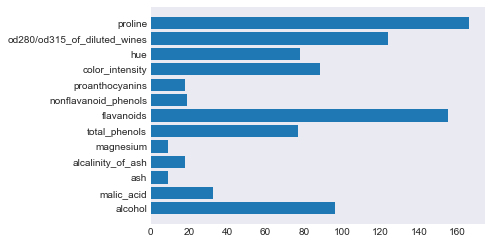

In [10]:
# guardo i punteggi delle features usando SelectKbest
selector = SelectKBest(k = 'all')
"""
sapresti spiegare come funziona la procedura che hai scelto? che criterio viene
usato per dare il punteggio alle feature?

La procedura in questione seleziona le k migliori features tra quelle presenti nel training set.
Il criterio utilizzato è una statistica test (in questo caso quella di default
che è il test di ANOVA, in quanto adatto a task di classificazione)
---
ok: https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test
---

idealmente, quando fai feature selection (e in generale per qualsiasi
operazione di fine-tuning), dovresti usare solo i dati di training; immagina
sempre che il test set non sia disponibile fino alla fine dell'addestramento
"""

# applico il selezionatore solo al training set, e stampo i punteggi delle feature
selector.fit(X_train, y_train)
print(selector.scores_)

# seleziono solo le features con uno score superiore a 50
print(len([score for score in selector.scores_ if score > 50 ]))

plt.style.use('seaborn-dark')
plt.barh(y = X_train.columns, width = selector.scores_)
plt.show()


In [ ]:
"""
nel grafico potresti ordinarle per importanza (prova anche con seaborn)
"""

In [11]:
# creo un selezionatore delle migliori 7 features
selector = SelectKBest(k = 7)

"""
perché le migliori sette?

Dai punteggi ho notato una grande differenza tra i punteggi di alcune features
e quelli di altre. Quindi ho usato 50 come punteggio soglia per separare
questi due gruppi. Stampando il numero delle features che soddisfavano questo requisito,
ho stabilito che il gruppo delle migliori features era composto da 7
di queste (ultimo passaggio della slide precedente).

ok, la soglia empirica mi torna di più del numero "7"

invece di riaddestrare SelectKBest con k=7 puoi usare i punteggi ottenuti e
la soglia che hai scelto come "maschera" per costruire X_train_new e X_test_new
a partire da X_train e X_test
"""

# trasformo la matrice delle features originale
X_train_new = selector.fit_transform(X_train, y_train)
print(X_train_new.shape)

(124, 7)


In [14]:
# creo un nuovo modello da addestrare sulla nuova matrice delle features
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 7)}
"""
vedi su per i commenti sugli iperparametri
"""

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10)

# addestro il modello sulla nuova matrice delle features
clf.fit(X_train_new, y_train)

# controllo i migliori valori dei parametri
print(f'''I migliori valori dei parametri sono {clf.best_params_} 
La loro accuratezza media è {clf.best_score_}''')


I migliori valori dei parametri sono {'max_features': 3, 'n_estimators': 95} 
La loro accuratezza media è 0.9836666666666666


In [16]:
# applico la selezione anche al test set
X_test_new = selector.fit_transform(X_test, y_test)

# ricalcolo l'accuratezza del modello
clf.score(X_test_new, y_test)

0.9814814814814815

Ricalcolando l'accuratezza risulta evidente che quasi tutta l'informazione necessaria al modello per la prediction è prodotta dalle migliori 7 features: nonostante siano state eliminate 5 features, la perdita della precisione è solamente dell' 1%!

In [ ]:
"""
ok; la perdita di accuratezza :D
"""

In [54]:
wine = datasets.load_wine()
original_features = np.array(wine.feature_names)
features_filter = selector.get_support()

"""
occhio a non usare nomi di variabili che sono già keyword del linguaggio
"""

print('Le migliori 7 features sono: ')
print([feature for feature in original_features[features_filter]])

Le migliori 7 features sono: 
['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
